In [40]:
#!/usr/bin/env python3
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [41]:
### Data
### Data
d_hand_crafted = {'Dataset': ['Human data','Human RBP data','Mouse data','Human data','Human RBP data','Mouse data','Human data','Human RBP data','Mouse data'], 
                  'Model': ['Human','Human','Human','Human RBP','Human RBP','Human RBP','Mouse','Mouse','Mouse'],
                  'F1 score': [0.85, 0.93, 0.64,0.86, 0.85, 0.62,0.59, 0.59, 0.86]} 
df_hand_crafted = pd.DataFrame(data=d_hand_crafted)

In [42]:
### Data
d_structure = {'Dataset': ['Human data','Human RBP data','Mouse data','Human data','Human RBP data','Mouse data','Human data','Human RBP data','Mouse data'], 
               'Model': ['Human','Human','Human','Human RBP','Human RBP','Human RBP','Mouse','Mouse','Mouse'],
               'F1 score': [0.91, 0.95, 0.68,0.89, 0.91, 0.66,0.58, 0.58, 0.92]}
df_structure = pd.DataFrame(data=d_structure)

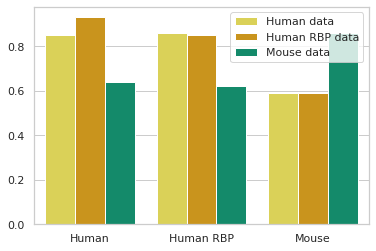

In [43]:
sns.set(style="whitegrid", font_scale=1)

fig, ax = plt.subplots()

sns.barplot(x="Model", y="F1 score", data=d_hand_crafted, hue="Dataset" , palette= ['#F0E442','#E69F00','#009E73'])

#ax.set_xlabel('')
#ax.set_ylabel('recovery')

#ax.set_ylim([0,1])


#fig.savefig('F1_structure_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')

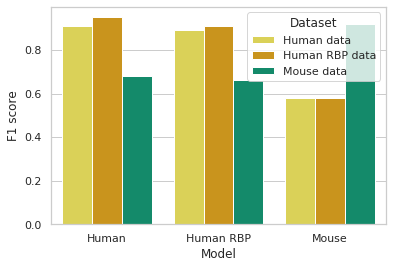

In [44]:
sns.set(style="whitegrid", font_scale=1)

fig, ax = plt.subplots()

sns.barplot(x="Model", y="F1 score", data=df_structure, hue="Dataset", palette= ['#F0E442','#E69F00','#009E73'])

#ax.set_xlabel('')
#ax.set_ylabel('recovery')

#ax.set_ylim([0,1])


#fig.savefig('F1_structure_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')

In [45]:
# concatinat datasets
df_hand_crafted['feature set'] = 'hand crafted'
df_structure['feature set'] = 'structure'

df_full = pd.concat([df_hand_crafted, df_structure], ignore_index=True)

In [46]:
df_full

,Dataset,Model,F1 score,feature set
0,Human data,Human,0.85,hand crafted
1,Human RBP data,Human,0.93,hand crafted
2,Mouse data,Human,0.64,hand crafted
3,Human data,Human RBP,0.86,hand crafted
4,Human RBP data,Human RBP,0.85,hand crafted
5,Mouse data,Human RBP,0.62,hand crafted
6,Human data,Mouse,0.59,hand crafted
7,Human RBP data,Mouse,0.59,hand crafted
8,Mouse data,Mouse,0.86,hand crafted
9,Human data,Human,0.91,structure


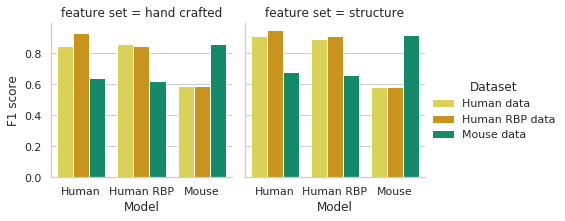

In [56]:
fig = sns.catplot(
    data=df_full, x="Model", y="F1 score", col="feature set", hue="Dataset",
    kind="bar", palette=['#F0E442','#E69F00','#009E73'],height=3
)
#g.set_axis_labels("", "Survival Rate")
#g.set_xticklabels(["Men", "Women", "Children"])
#g.set_titles("{col_name} {col_var}")
#g.set(ylim=(0, 1))
#g.despine(left=True)
fig.savefig('F1_cross_model_plot.pdf', format='pdf', dpi=300, bbox_inches='tight')

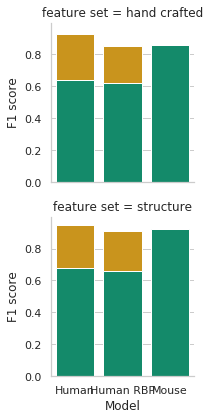

In [48]:
model = df_full.Model.unique()

g = sns.FacetGrid(df_full, row="feature set", hue="Dataset",
                  palette=['#F0E442','#E69F00','#009E73'])
g.map(sns.barplot, 'Model', 'F1 score', order=model)

/home/teresa/Software/miniconda3/envs/notebook/lib/python3.8/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


ValueError: Could not interpret input 'Dataset'

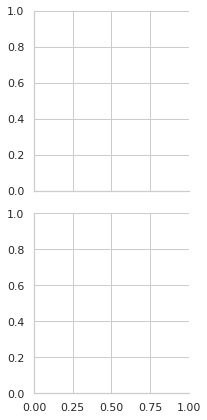

In [33]:
g = sns.FacetGrid(df_full,  row="feature set")
g.map(sns.barplot, "Model", "F1 score", hue="Dataset")
